# (Split 7/3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error

In [2]:
# 1. Đọc file csv và gắng index với giá Price
df = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\ELC.csv')
df1 = df.reset_index()['close']

In [3]:
# 2. Scaler data
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [4]:
# 3. Chia train/test: 70/30
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
# 4. Tạo dữ liệu X, y cho mô hình ARIMA (không cần reshape như với Linear Regression)
y_train = train_data.reshape(-1)
y_test = test_data.reshape(-1)

In [6]:
# 6. Tìm mô hình ARIMA tốt nhất bằng auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5885.363, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5812.138, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5869.390, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5883.905, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5814.114, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5883.838, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5885.986, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5883.978, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5887.969, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-5885.999, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5884.028, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-5889.950, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5871.378, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-5887.981, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# 8. Dự báo dữ liệu test
n_periods = len(y_test)
y_pred = model.predict(n_periods=n_periods)

In [8]:
# 9. Chuẩn hóa dữ liệu y_pred
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Chuẩn hóa ngược lại y_train và y_test
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [9]:
# 10. Đánh giá độ chính xác thuật toán bằng RMSE, MAE, MAPE, MSLE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)
print('Testing MSLE:', test_msle)


Testing RMSE: 11280.613511210315
Testing MAE: 9284.62181732677
Testing MAPE: 53.74649979268526
Testing MSLE: 0.958313187604871


In [10]:
# 11. Dự báo 30, 60, 90 ngày tiếp theo
def predict_future_days_arima(model, data, days):
    forecast = model.predict(n_periods=days)
    return scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

n_days = [30, 60, 90]
predictions = {days: predict_future_days_arima(model, test_data, days) for days in n_days}


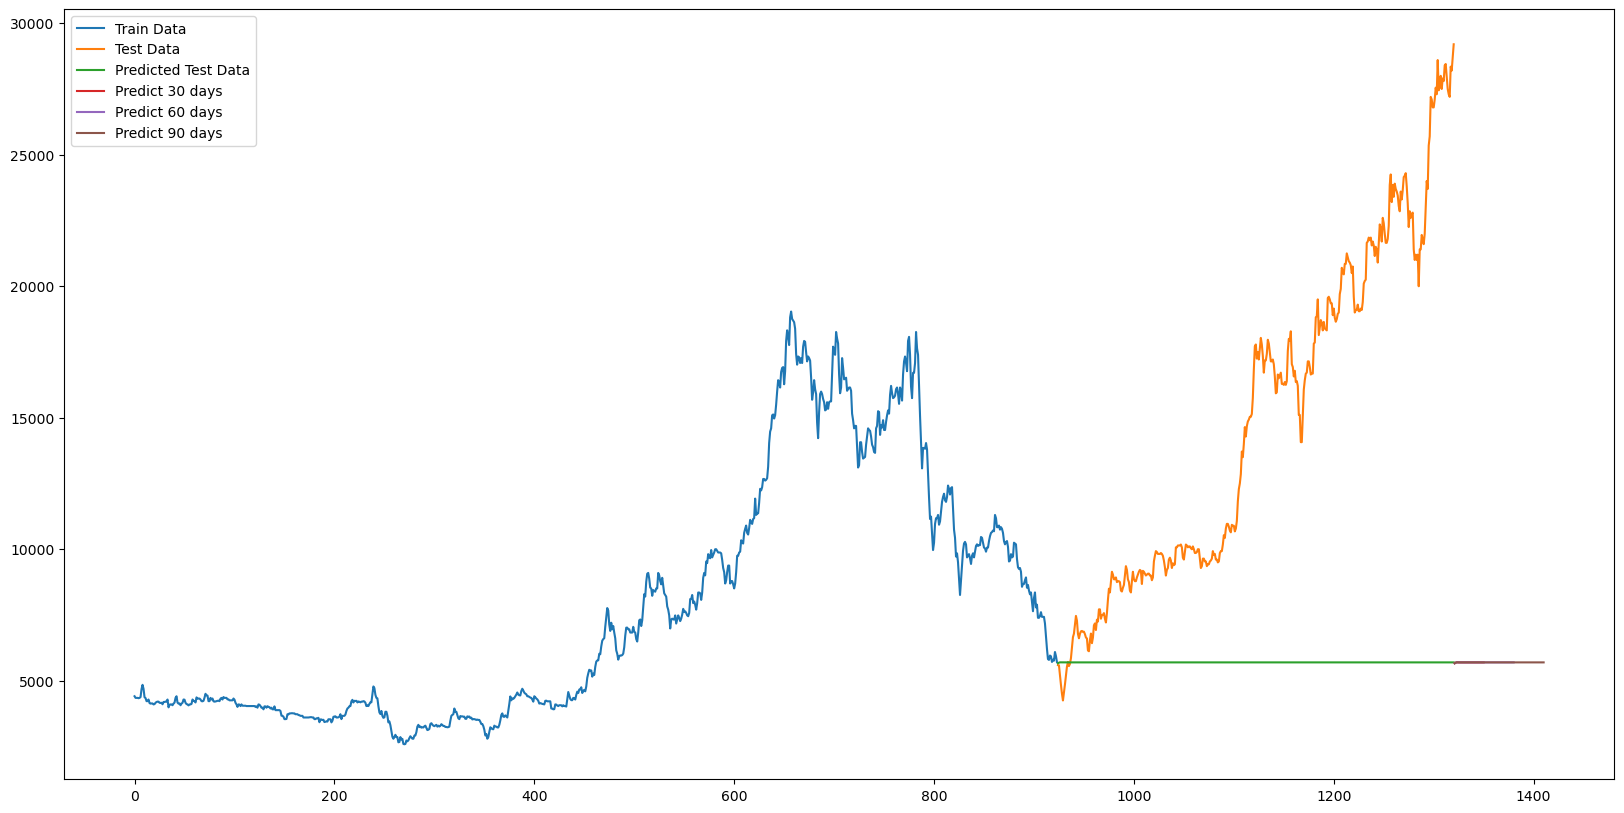

In [11]:
# 12. Vẽ hình tổng quan
plt.figure(figsize=(20, 10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train Data')

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test Data')
plt.plot(test_data_index, y_pred, label='Predicted Test Data')

for days, pred in predictions.items():
    pred_index = pd.RangeIndex(start=len(df1), stop=len(df1) + days, step=1)
    plt.plot(pred_index, pred, label=f'Predict {days} days')

plt.legend()
plt.show()

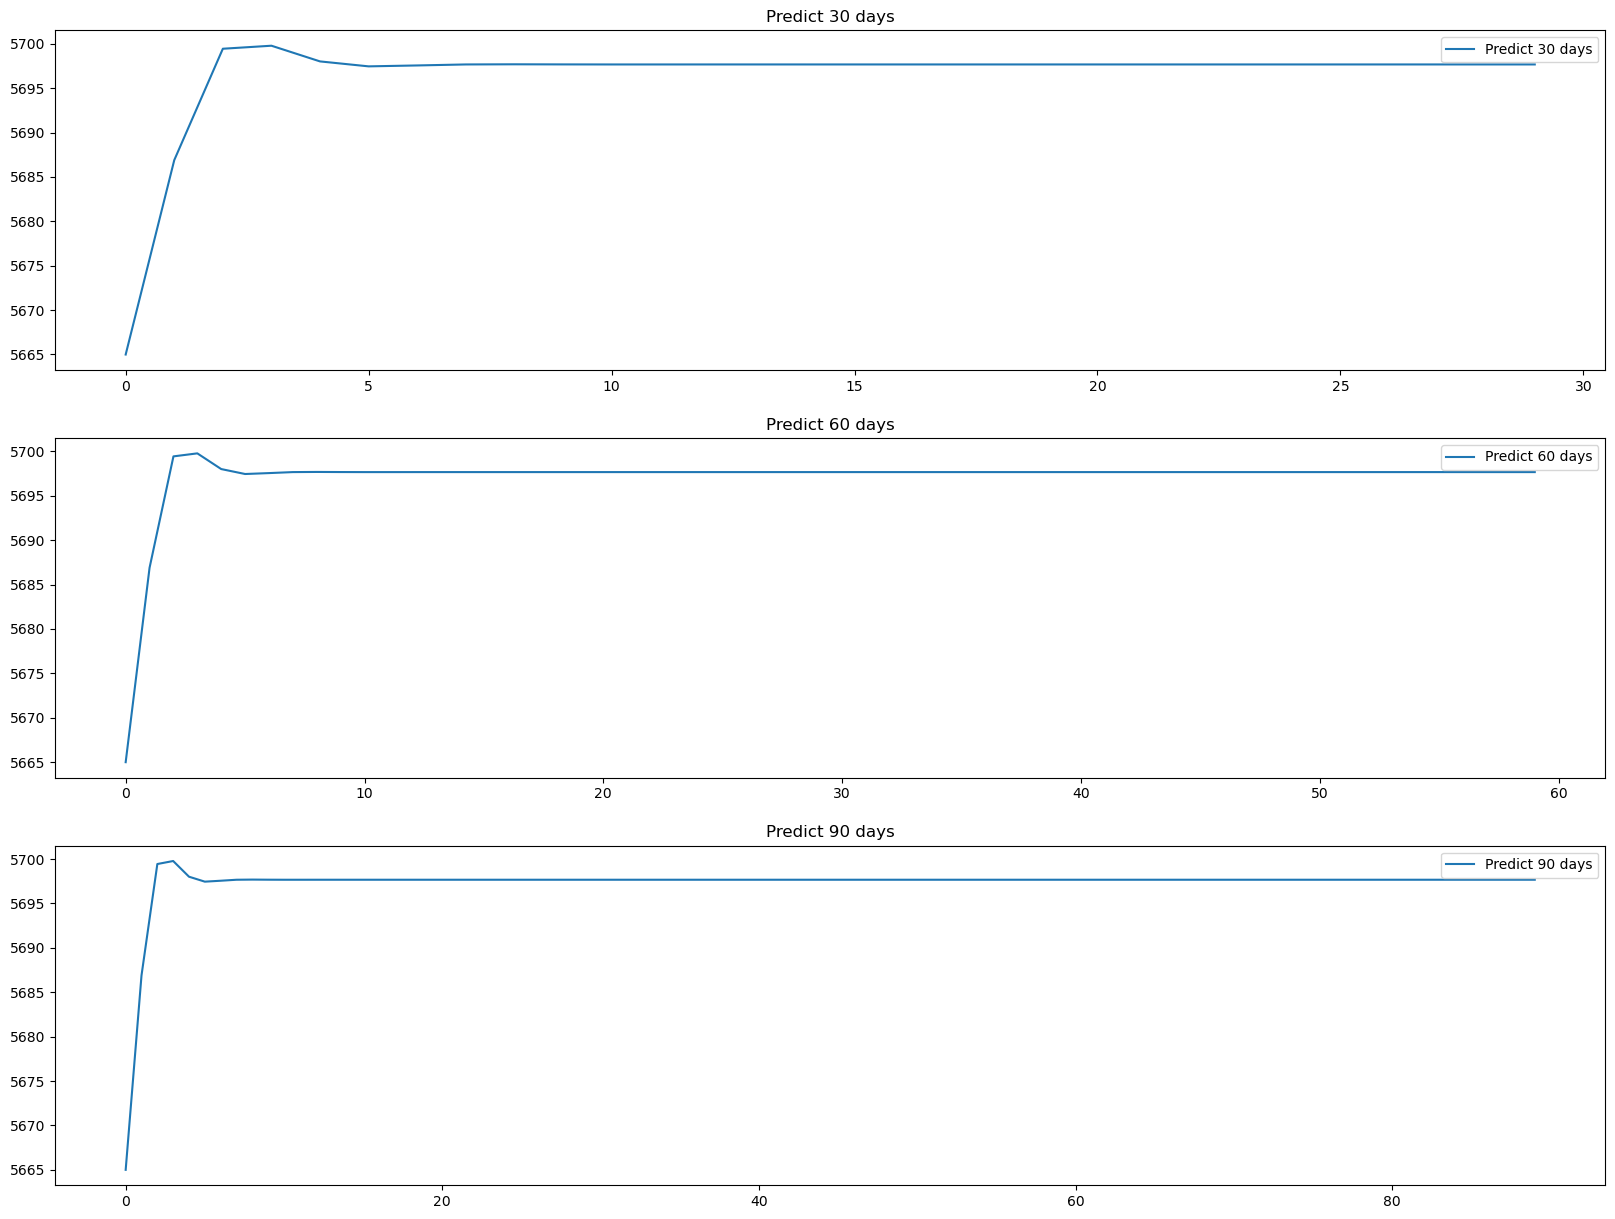

In [12]:
# 13. Vẽ hình riêng biệt cho 30, 60, 90 ngày
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

for i, days in enumerate(n_days):
    pred = predictions[days]
    pred_index = pd.RangeIndex(start=0, stop=days, step=1)
    axs[i].plot(pred_index, pred)
    axs[i].set_title(f'Predict {days} days')
    axs[i].legend([f'Predict {days} days'])

plt.show()

# (Split 8/2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6759.051, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6674.190, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6740.053, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6757.487, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6675.773, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6758.088, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6760.171, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6757.589, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6762.165, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6760.173, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6758.191, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-6763.826, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6741.804, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-6761.833, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0

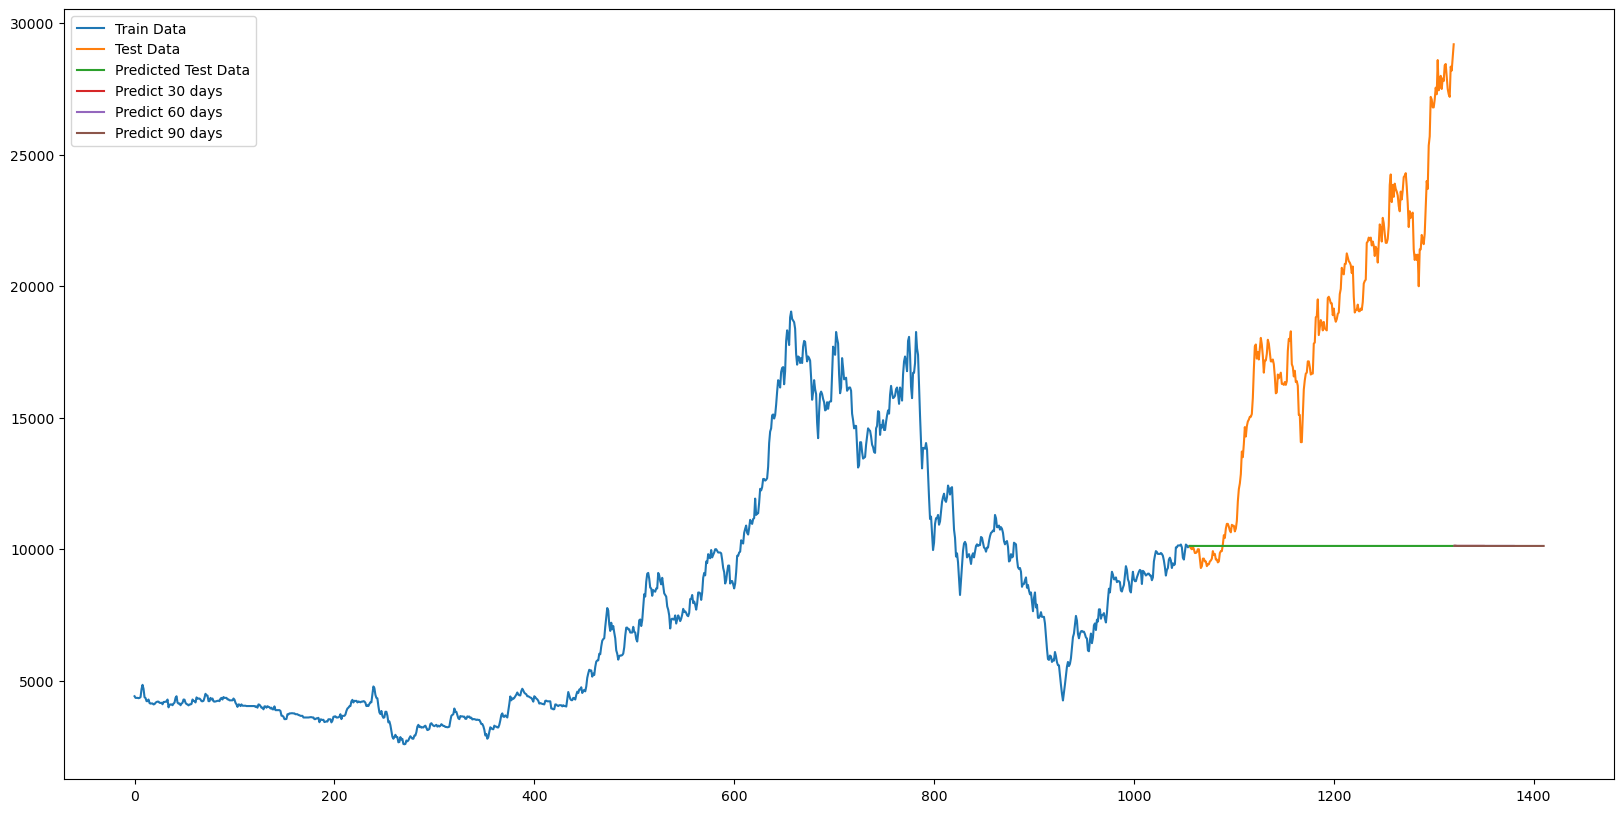

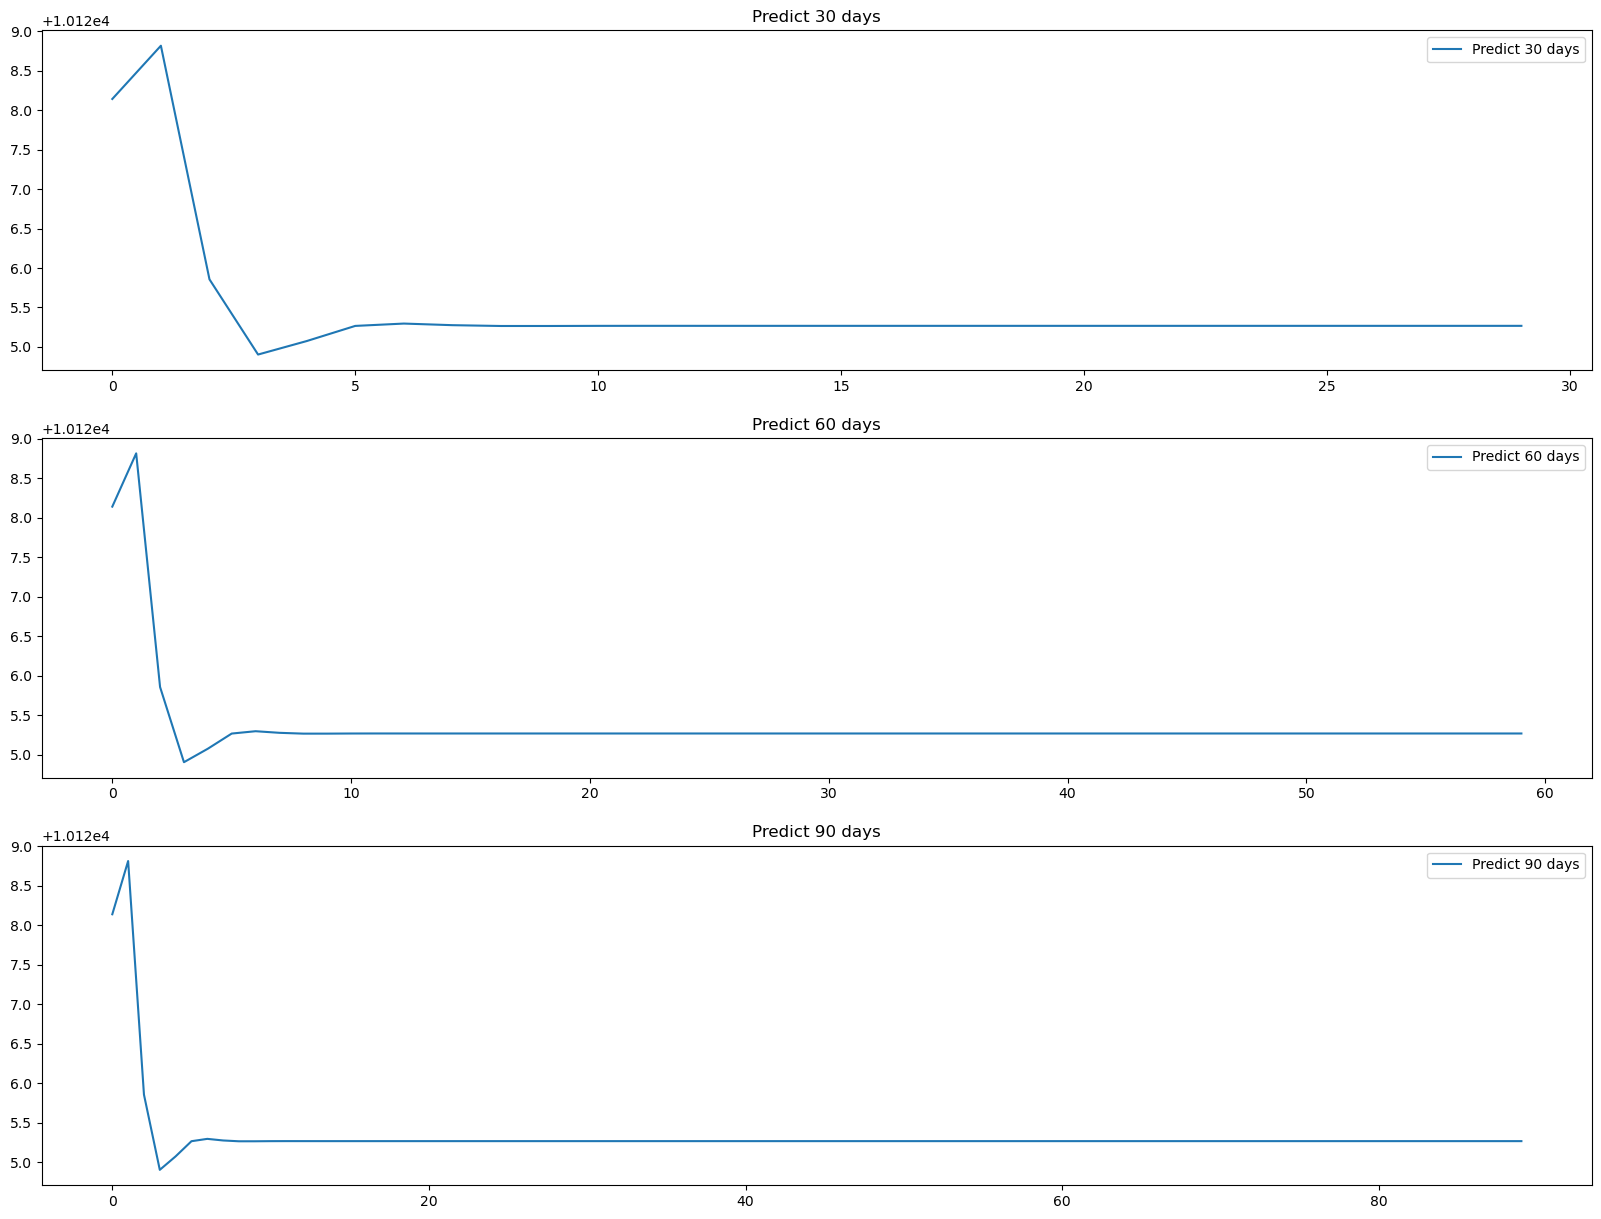

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pmdarima.arima import auto_arima

# 1. Đọc file csv và gắn index với giá Price
df = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\ELC.csv')
df1 = df.reset_index()['close']

# 2. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 3. Chia train/test: 80/20
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

# 4. Tạo dữ liệu X, y cho mô hình ARIMA (không cần reshape như với Linear Regression)
y_train = train_data.reshape(-1)
y_test = test_data.reshape(-1)

# 6. Tìm mô hình ARIMA tốt nhất bằng auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 8. Dự báo dữ liệu test
n_periods = len(y_test)
y_pred = model.predict(n_periods=n_periods)

# 9. Chuẩn hóa dữ liệu y_pred
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Chuẩn hóa ngược lại y_train và y_test
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# 10. Đánh giá độ chính xác thuật toán bằng RMSE, MAE, MAPE, MSLE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)
print('Testing MSLE:', test_msle)

# 11. Dự báo 30, 60, 90 ngày tiếp theo
def predict_future_days_arima(model, data, days):
    forecast = model.predict(n_periods=days)
    return scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

n_days = [30, 60, 90]
predictions = {days: predict_future_days_arima(model, test_data, days) for days in n_days}

# 12. Vẽ hình tổng quan
plt.figure(figsize=(20, 10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train Data')

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test Data')
plt.plot(test_data_index, y_pred, label='Predicted Test Data')

for days, pred in predictions.items():
    pred_index = pd.RangeIndex(start=len(df1), stop=len(df1) + days, step=1)
    plt.plot(pred_index, pred, label=f'Predict {days} days')

plt.legend()
plt.show()

# 13. Vẽ hình riêng biệt cho 30, 60, 90 ngày
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

for i, days in enumerate(n_days):
    pred = predictions[days]
    pred_index = pd.RangeIndex(start=0, stop=days, step=1)
    axs[i].plot(pred_index, pred)
    axs[i].set_title(f'Predict {days} days')
    axs[i].legend([f'Predict {days} days'])

plt.show()


# (Split 9/1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7411.190, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7342.875, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7404.810, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7410.605, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7342.850, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7406.859, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7408.756, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-7405.756, Time=1.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7415.555, Time=1.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-7408.445, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-7405.011, Time=1.69 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-7406.608, Time=0.70 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-7406.607, Time=0.40 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-7404.876, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0

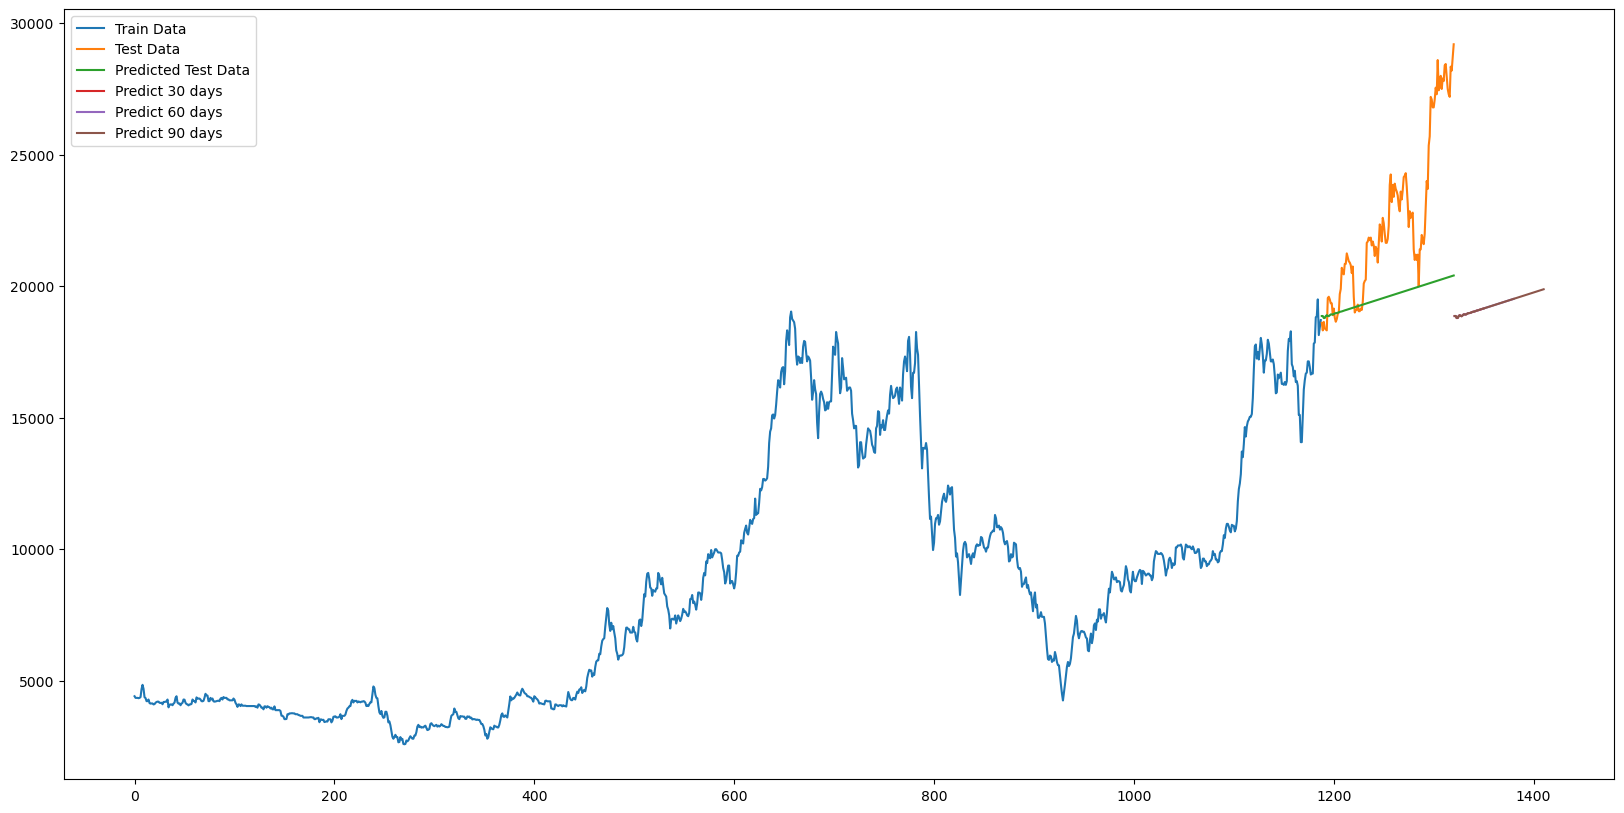

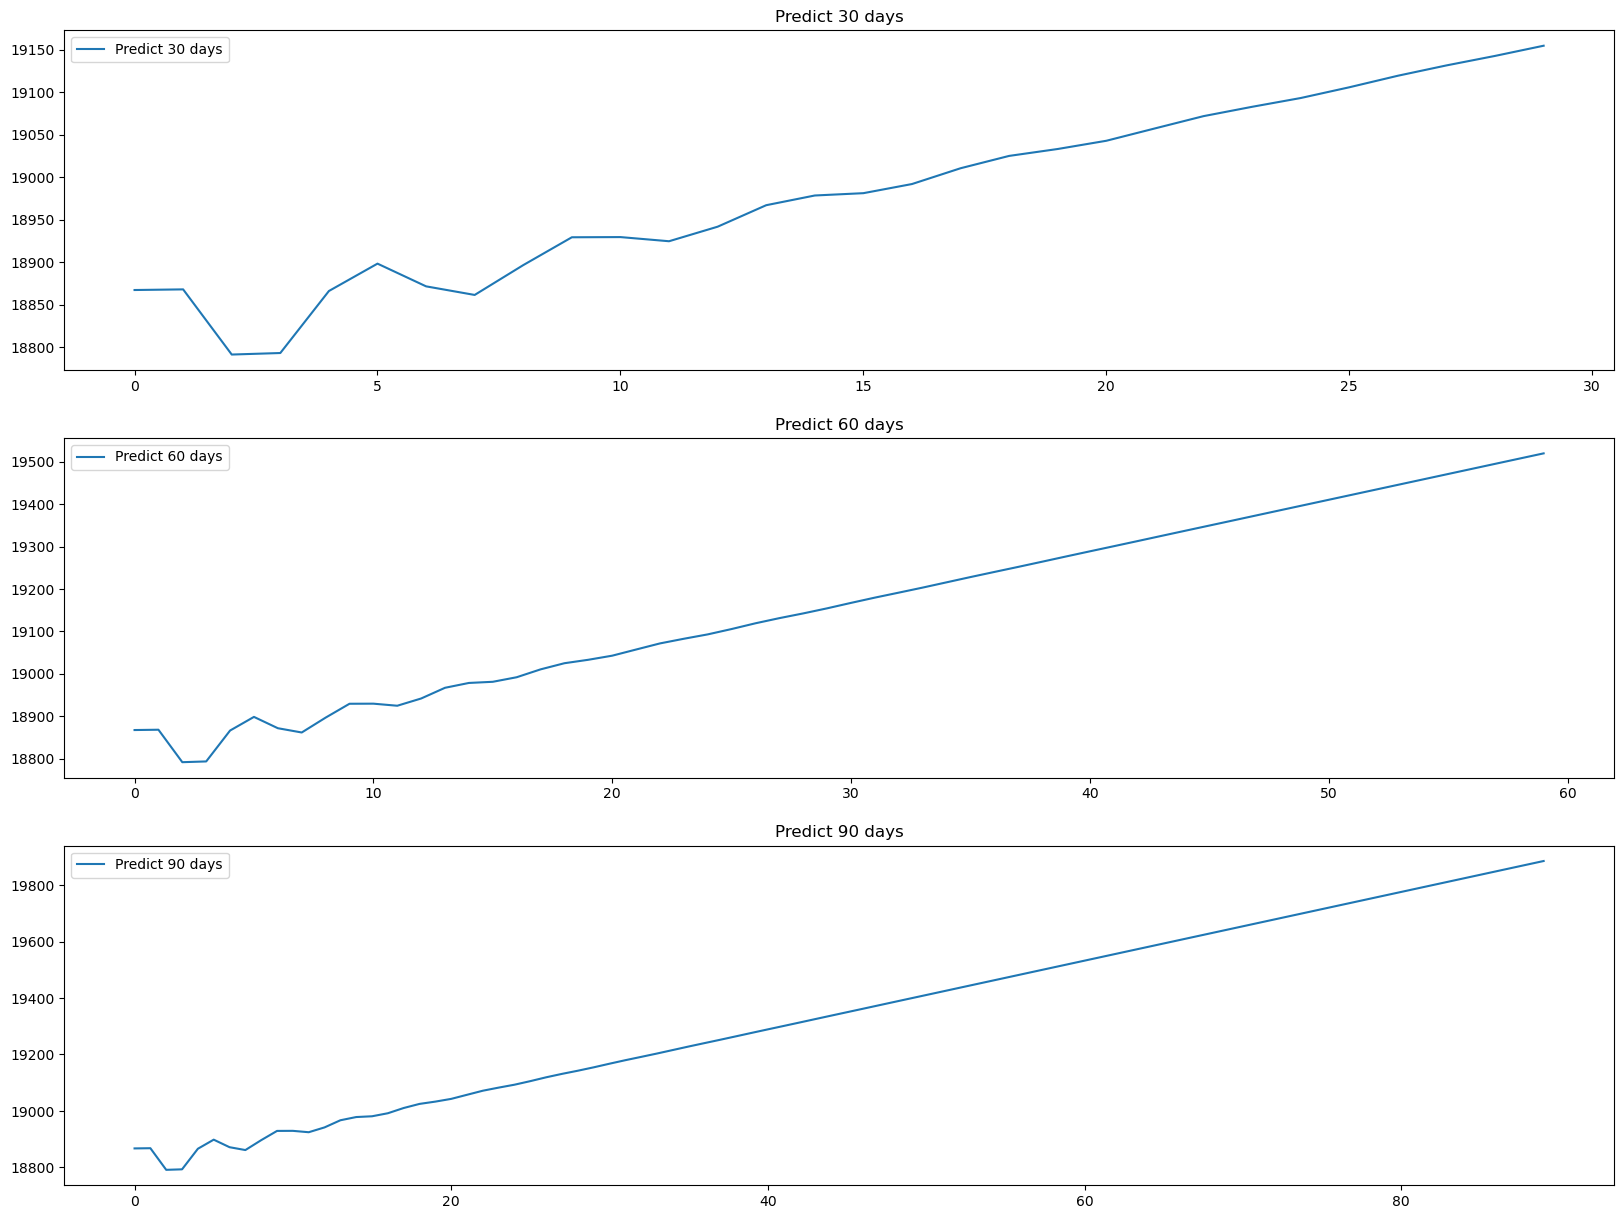

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pmdarima.arima import auto_arima

# 1. Đọc file csv và gắn index với giá Price
df = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\ELC.csv')
df1 = df.reset_index()['close']

# 2. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 3. Chia train/test: 80/20
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

# 4. Tạo dữ liệu X, y cho mô hình ARIMA (không cần reshape như với Linear Regression)
y_train = train_data.reshape(-1)
y_test = test_data.reshape(-1)

# 6. Tìm mô hình ARIMA tốt nhất bằng auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 8. Dự báo dữ liệu test
n_periods = len(y_test)
y_pred = model.predict(n_periods=n_periods)

# 9. Chuẩn hóa dữ liệu y_pred
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Chuẩn hóa ngược lại y_train và y_test
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# 10. Đánh giá độ chính xác thuật toán bằng RMSE, MAE, MAPE, MSLE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)
print('Testing MSLE:', test_msle)

# 11. Dự báo 30, 60, 90 ngày tiếp theo
def predict_future_days_arima(model, data, days):
    forecast = model.predict(n_periods=days)
    return scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

n_days = [30, 60, 90]
predictions = {days: predict_future_days_arima(model, test_data, days) for days in n_days}

# 12. Vẽ hình tổng quan
plt.figure(figsize=(20, 10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train Data')

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test Data')
plt.plot(test_data_index, y_pred, label='Predicted Test Data')

for days, pred in predictions.items():
    pred_index = pd.RangeIndex(start=len(df1), stop=len(df1) + days, step=1)
    plt.plot(pred_index, pred, label=f'Predict {days} days')

plt.legend()
plt.show()

# 13. Vẽ hình riêng biệt cho 30, 60, 90 ngày
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

for i, days in enumerate(n_days):
    pred = predictions[days]
    pred_index = pd.RangeIndex(start=0, stop=days, step=1)
    axs[i].plot(pred_index, pred)
    axs[i].set_title(f'Predict {days} days')
    axs[i].legend([f'Predict {days} days'])

plt.show()
